In [3]:
import sys
import scipy
import argparse
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


sys.path.append('../datasets')
sys.path.append('../optimization')
sys.path.append('../util')
import eval as E
from find_z import find_z
from random_data import synthetic_problem_input


In [4]:

def setup_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--datadir', type=str,  help='directory storing dataset.')
    parser.add_argument('--split', type=int, default=1,
            choices=range(1,16), help='Choose the data iteration for experiment.')
    return parser.parse_args()

def load_train_test_data(datadir,split):
    DP = synthetic_problem_input(datadir = datadir,dset = 'train',split = split)
    DP_te =synthetic_problem_input(datadir = datadir,dset = 'test',split = split)
    return DP, DP_te

def eval_and_print(z,DP,ind=None):
    z0 = 1.0/DP.p * np.ones(DP.p)
    for k in range(DP.p):
        print 'error k={:d}:'.format(k), E.compute_loss_k(k,DP,ind=ind)
    print 'error z:', E.compute_weighted_loss(z,DP,ind=ind)
    print 'error z0:', E.compute_weighted_loss(z0,DP,ind=ind)

def main(datadir,split):
    DP, DP_te = load_train_test_data(datadir,split)

    print 'Solving for z...'
    z,g,zL,gL = find_z(DP)

    print 'Evaluating training data...'
    eval_and_print(z,DP)


    z_unif = 1.0/DP.p * np.ones(DP.p)
    print 'Eval global obj on train...'
    print 'z val=', E.global_obj(z, DP), 'z_unif val=', E.global_obj(z_unif, DP)

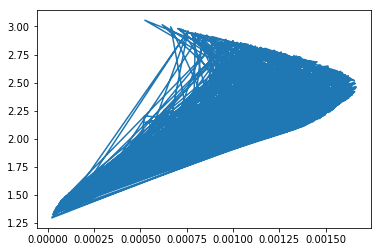

In [7]:
split = 1
datadir = '../sampledata/'
obj = np.genfromtxt(datadir+'iter_'+str(split)+'.csv', delimiter=',')
plt.plot(obj[:,0], obj[:,2]) 
plt.show()

In [9]:
main(datadir, split)

Solving for z...
g0 10
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0149072089433
            Iterations: 24
            Function evaluations: 115
            Gradient evaluations: 20
Optimization terminated successfully.
constraint value [  1.00149172e+11   9.98467559e+10   5.00000000e-01   5.00000000e-01]
iter 0: z= [ 0.49638192  0.50361808] gamma= 0.0149072089433
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0144936029904
            Iterations: 29
            Function evaluations: 104
            Gradient evaluations: 26
Optimization terminated successfully.
constraint value [  2.96224502e+08   4.38097594e+04   4.96381917e-01   5.03618083e-01]
iter 1: z= [ 0.49278737  0.50721263] gamma= 0.0144936029904
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.014087881488
            Iterations: 6
            Function evaluations: 13
            Gradient

../optimization/compute_quantities.py:230: RuntimeWarning: invalid value encountered in log
  a0 = (hz - y[x])**2 - 2*DP.M*np.log(Kz)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.00882115126027
            Iterations: 36
            Function evaluations: 173
            Gradient evaluations: 33
Optimization terminated successfully.
constraint value [  2.03011993e+08   2.87479329e+04   4.41575563e-01   5.58424437e-01]
iter 17: z= [ 0.43833512  0.56166488] gamma= 0.00882115126027
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0085174904732
            Iterations: 14
            Function evaluations: 76
            Gradient evaluations: 14
Optimization terminated successfully.
constraint value [  1.97511354e+08   2.81069503e+04   4.38335122e-01   5.61664878e-01]
iter 18: z= [ 0.43511572  0.56488428] gamma= 0.0085174904732
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.00821901065979
            Iterations: 11
            Function evaluations: 9
            Gradient evaluations: 7
Op

(1000, 5)